In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report


from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv(r'C:\Users\hp\Desktop\Projects\Data-Sience\car_price_prediction.csv')

# Explore Data

In [5]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [7]:
data.sample()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
18446,45793517,7840,1094,CHEVROLET,Captiva,2008,Jeep,Yes,Diesel,2,54278 km,4.0,Automatic,Front,04-May,Left wheel,White,4


In [9]:
data.shape

(19237, 18)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [17]:
data.duplicated().sum()

0

In [15]:
data.drop_duplicates(inplace=True)

In [19]:
data.shape

(18924, 18)

In [21]:
data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.892400e+04,1.892400e+04,18924.000000,18924.000000,18924.000000
mean,4.557538e+07,1.858744e+04,2010.914236,4.580216,6.568379
std,9.375468e+05,1.921356e+05,5.665749,1.200223,4.322323
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569501e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577191e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580174e+07,2.206300e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [23]:
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

# Analysis

In [25]:
for col in data.columns:
    print(col,":",data[col].nunique())

ID : 18924
Price : 2315
Levy : 559
Manufacturer : 65
Model : 1590
Prod. year : 54
Category : 11
Leather interior : 2
Fuel type : 7
Engine volume : 107
Mileage : 7687
Cylinders : 13
Gear box type : 4
Drive wheels : 3
Doors : 3
Wheel : 2
Color : 16
Airbags : 17


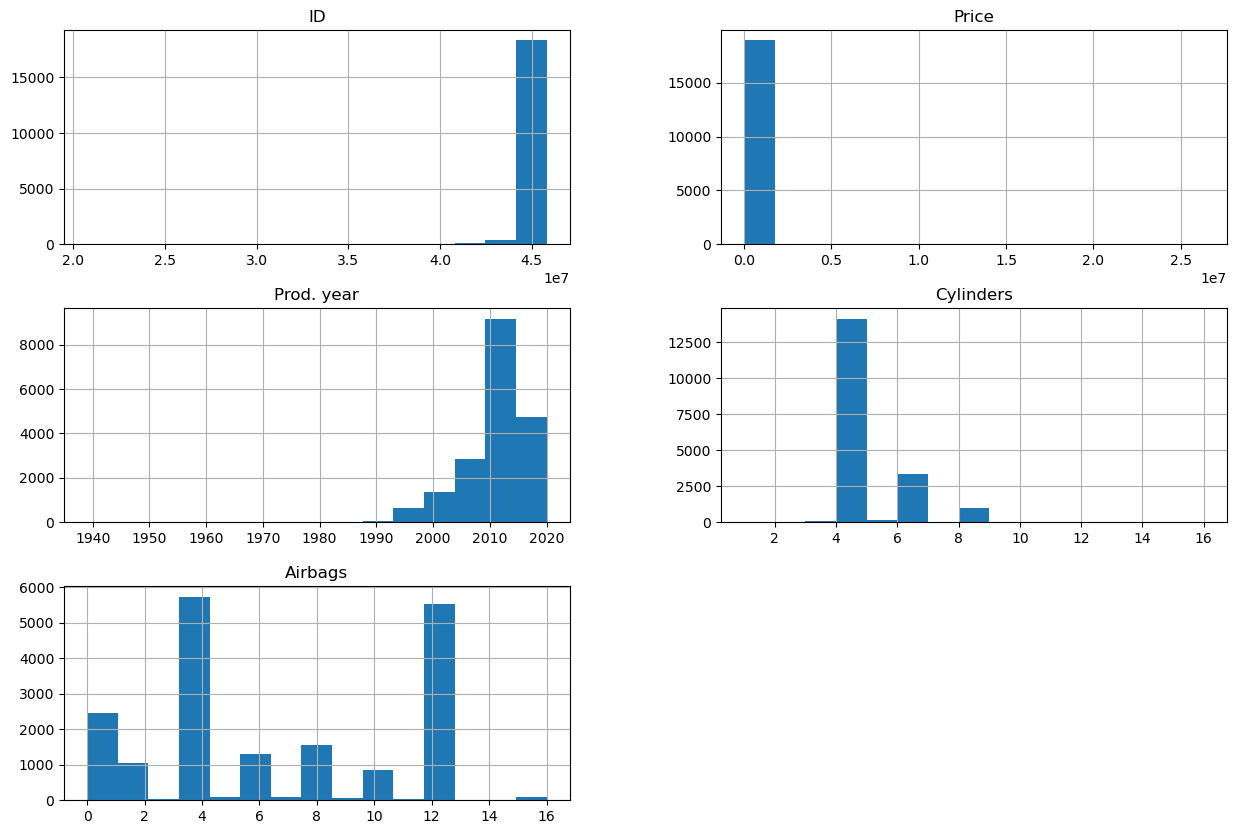

In [27]:
data.hist(bins=15,figsize=(15,10))
plt.show()

In [29]:
top10Cares=data['Manufacturer'].value_counts().sort_values(ascending=False)[:10]
top10Cares

Manufacturer
HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
BMW              1036
HONDA             960
LEXUS             927
NISSAN            645
VOLKSWAGEN        571
Name: count, dtype: int64

<Axes: xlabel='Manufacturer'>

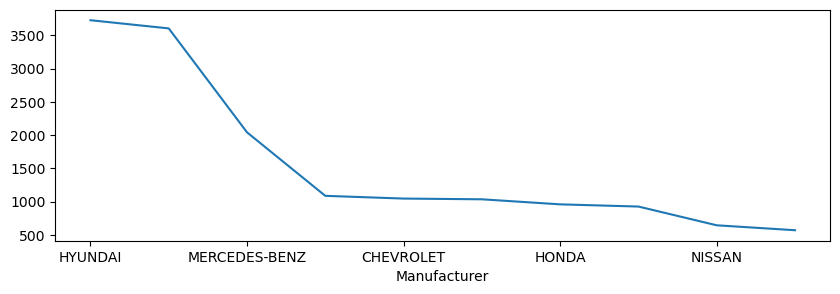

In [31]:
top10Cares.plot(figsize=(10,3))

In [33]:
la=LabelEncoder()

In [35]:
obj=data.select_dtypes(include='object')

In [37]:
obj

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
0,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,Automatic,4x4,04-May,Left wheel,Silver
1,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,Tiptronic,4x4,04-May,Left wheel,Black
2,-,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,Variator,Front,04-May,Right-hand drive,Black
3,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,Automatic,4x4,04-May,Left wheel,White
4,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,Automatic,Front,04-May,Left wheel,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,-,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,2.0 Turbo,300000 km,Manual,Rear,02-Mar,Left wheel,Silver
19233,831,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600 km,Tiptronic,Front,04-May,Left wheel,Red
19234,836,HYUNDAI,Tucson,Jeep,Yes,Diesel,2,116365 km,Automatic,Front,04-May,Left wheel,Grey
19235,1288,CHEVROLET,Captiva,Jeep,Yes,Diesel,2,51258 km,Automatic,Front,04-May,Left wheel,Black


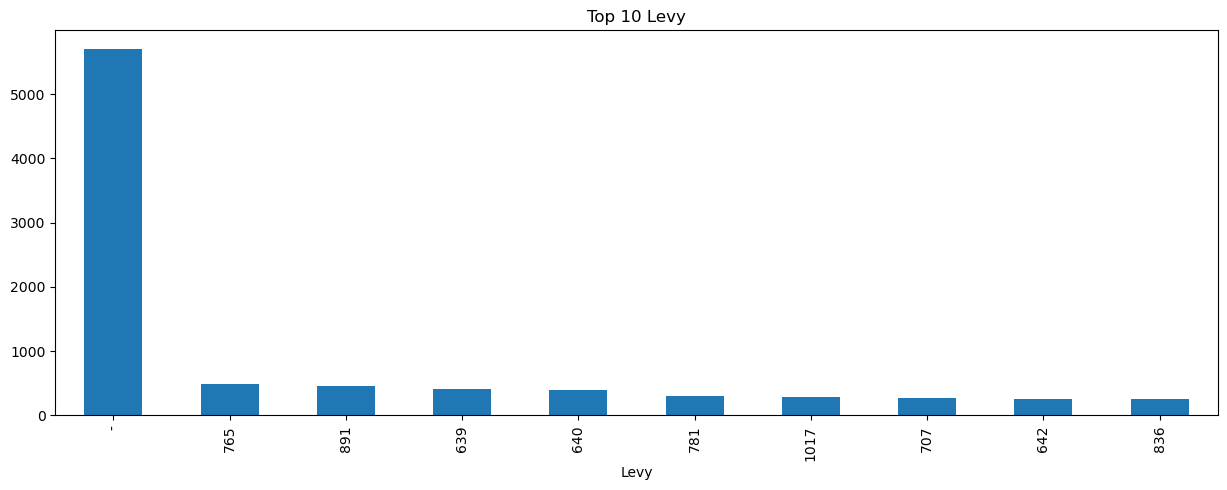

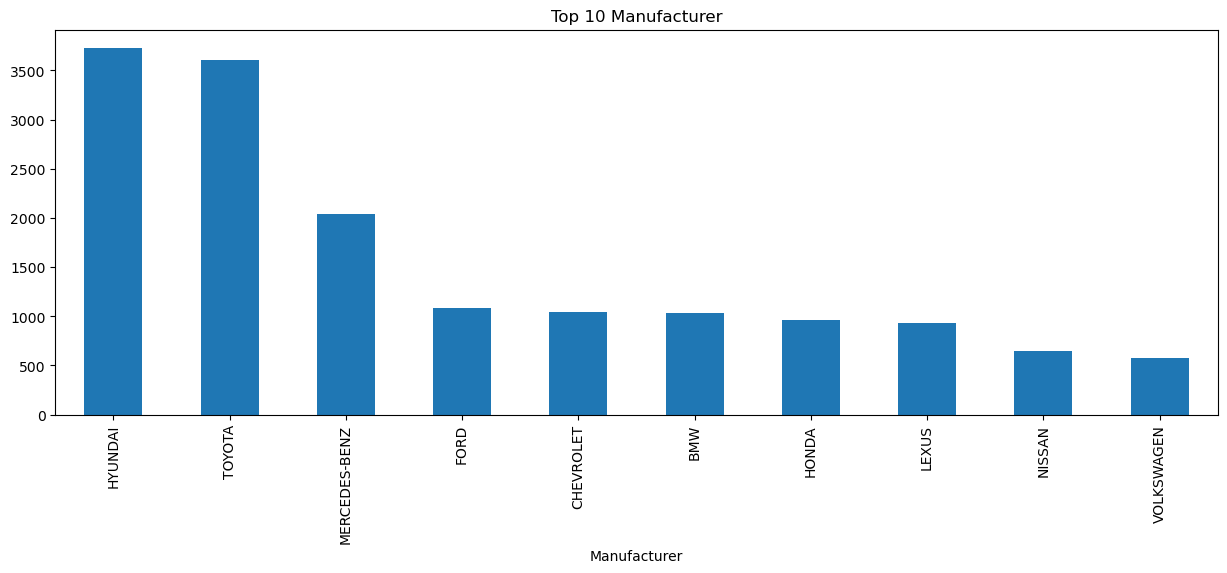

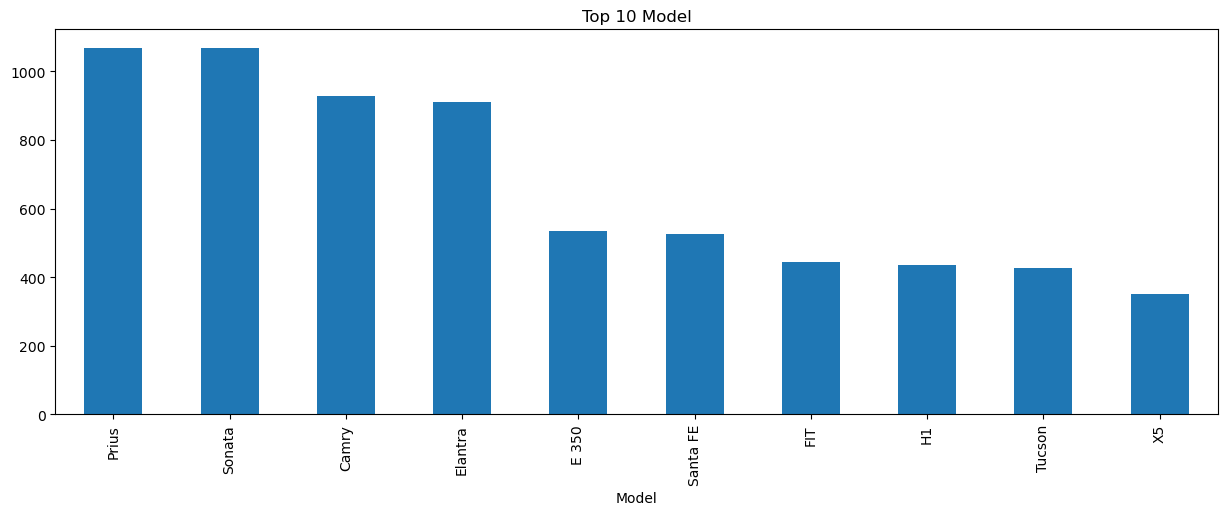

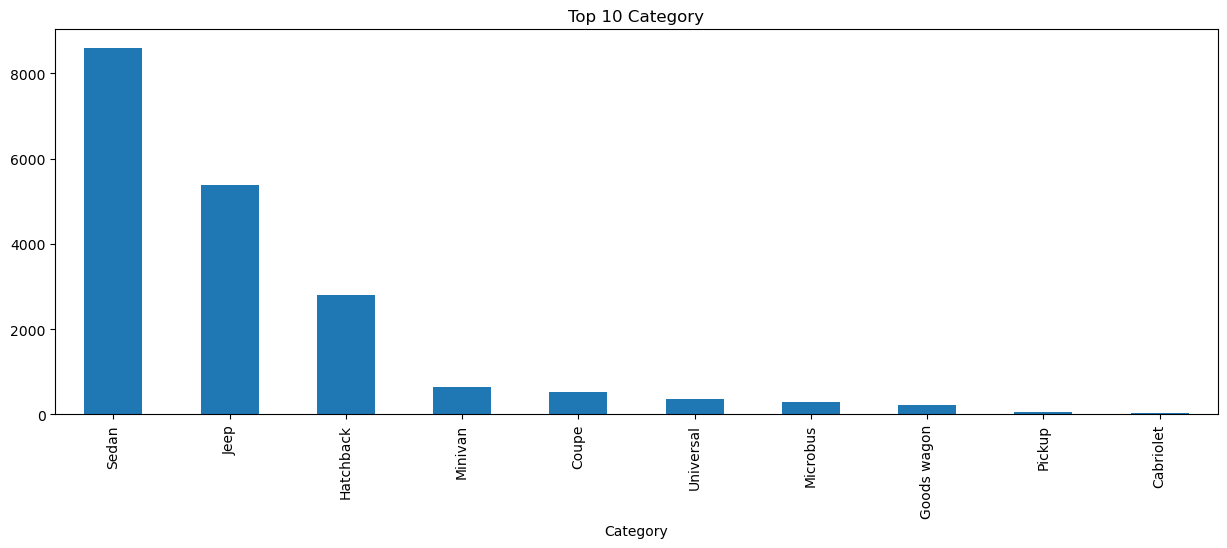

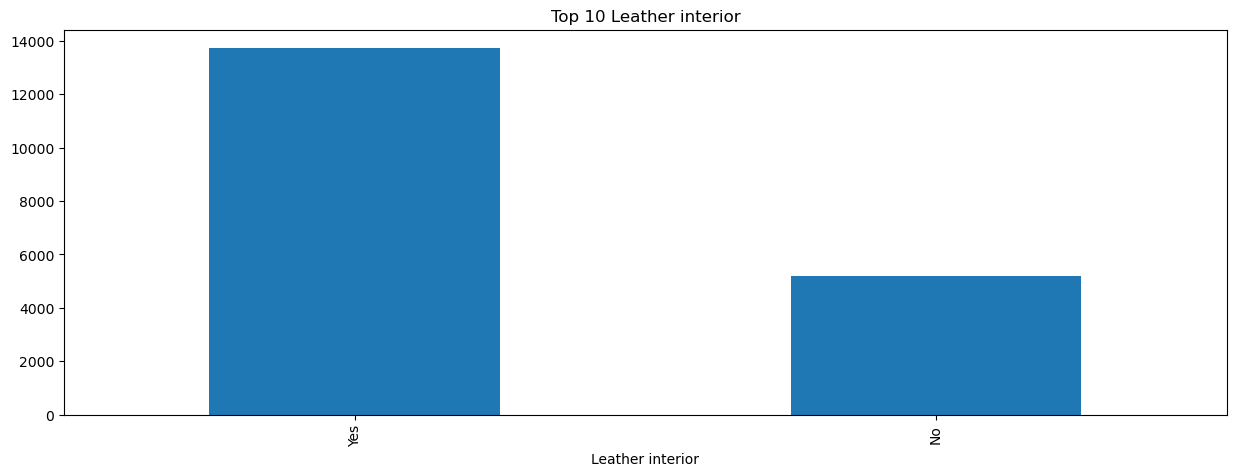

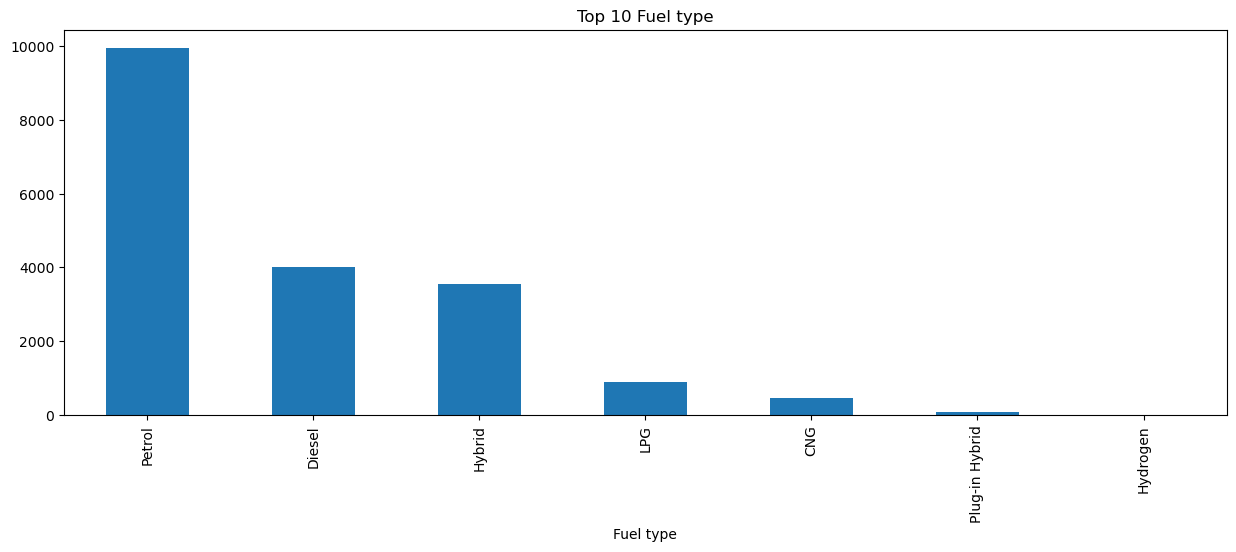

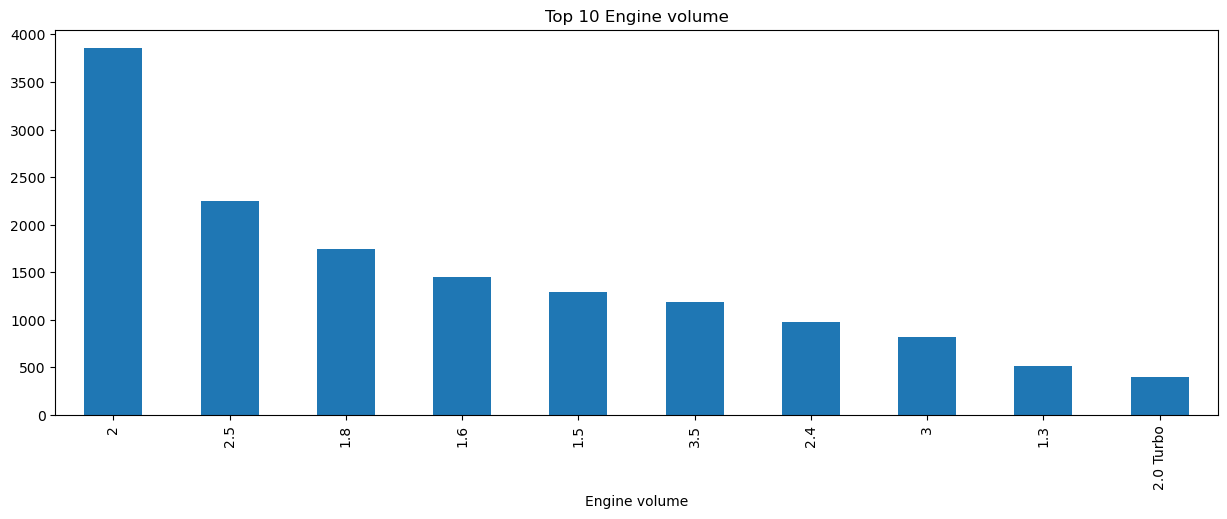

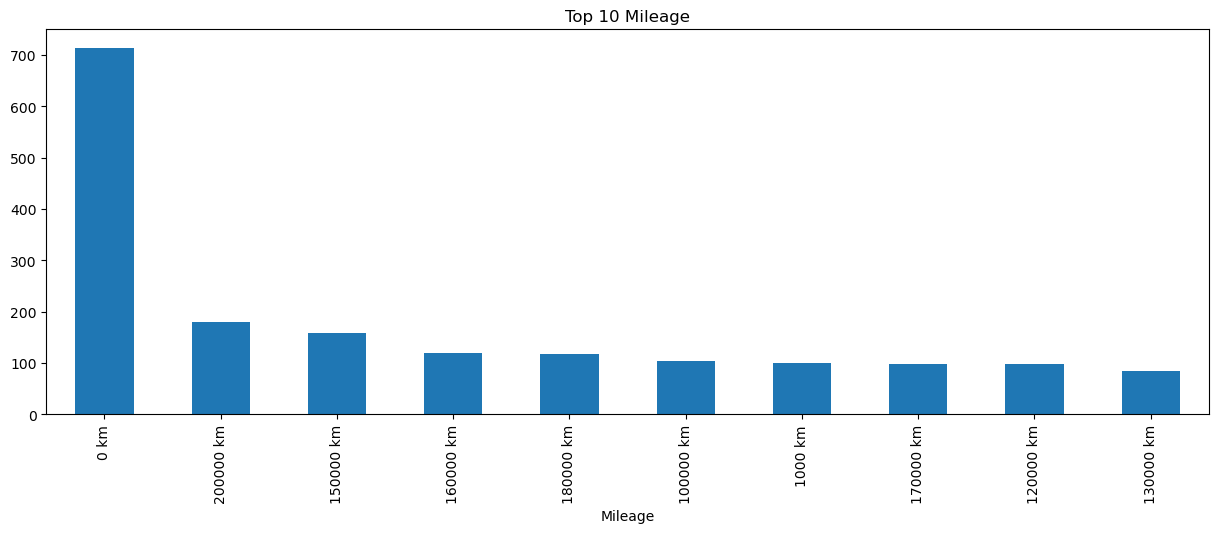

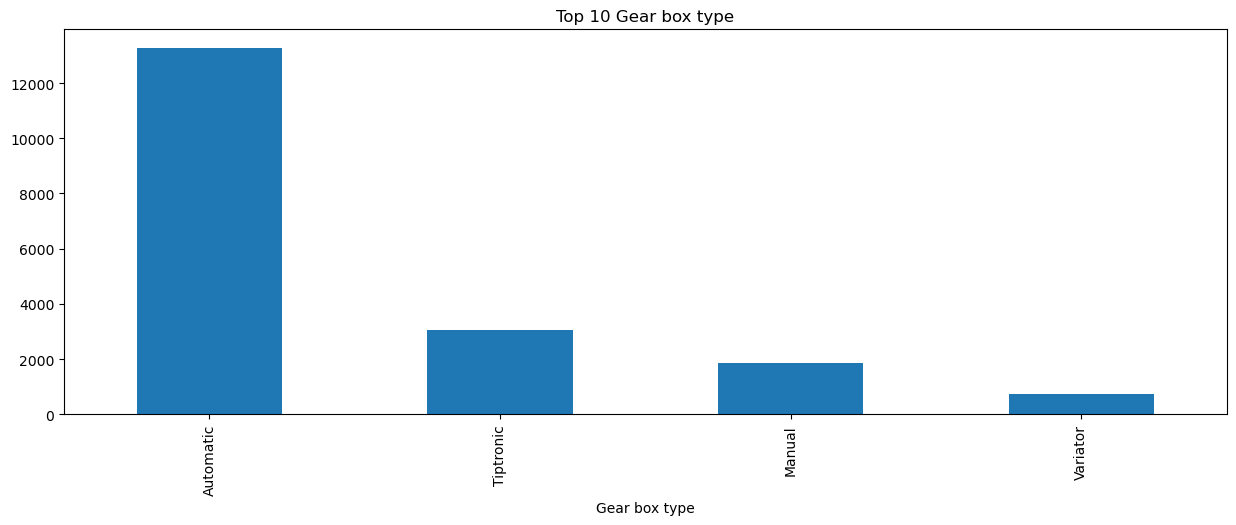

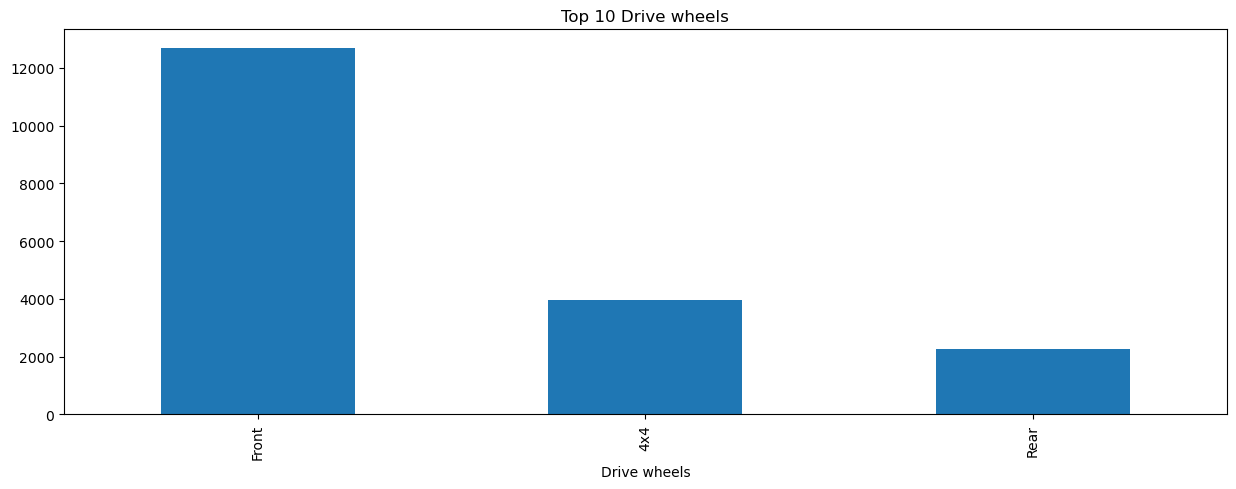

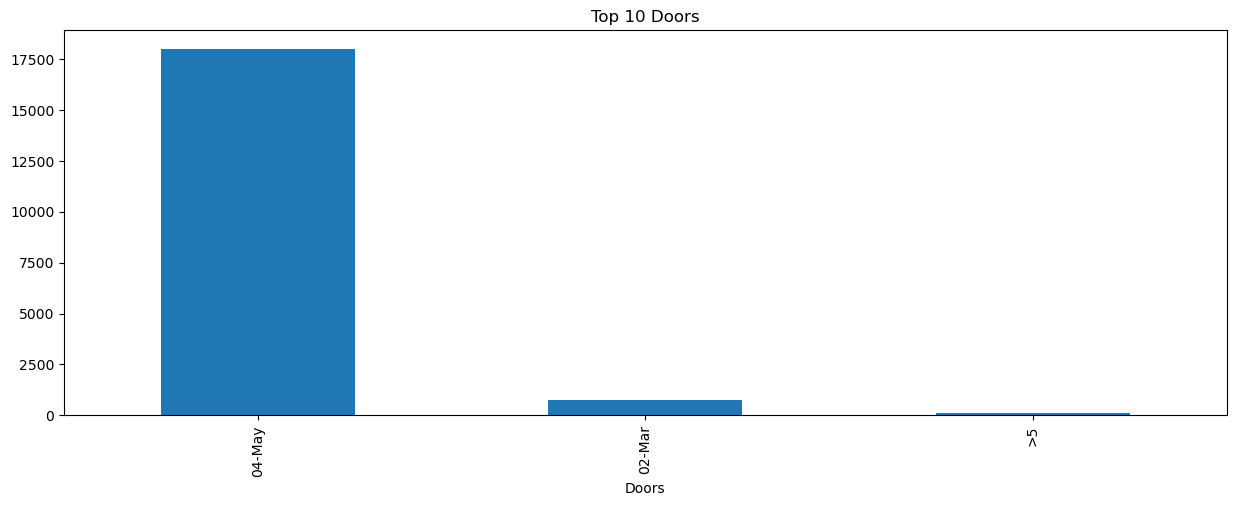

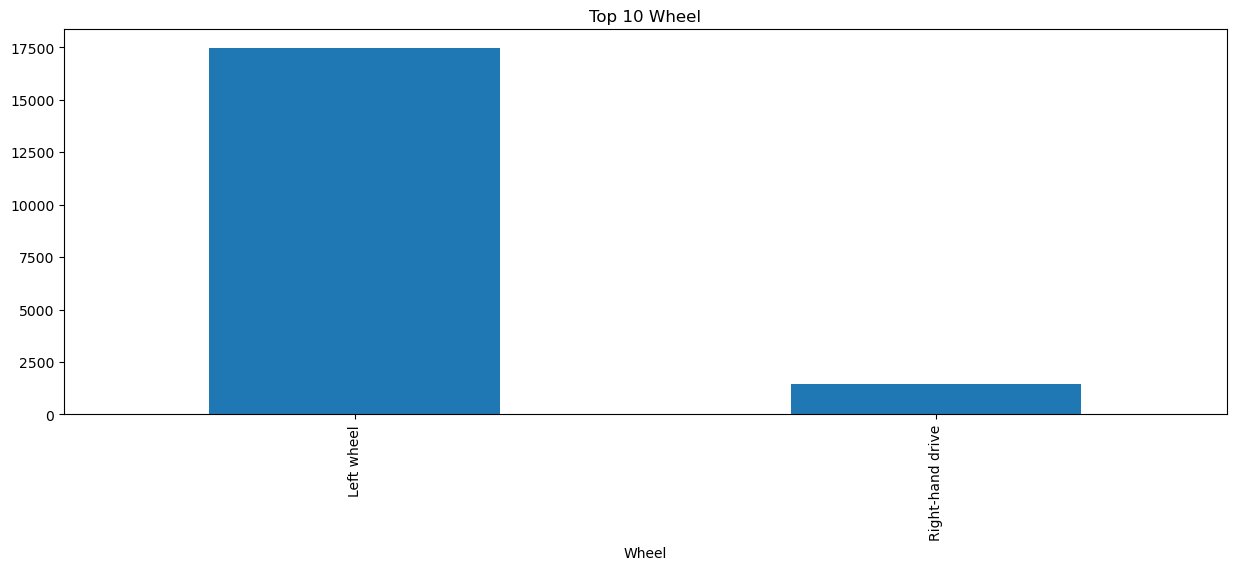

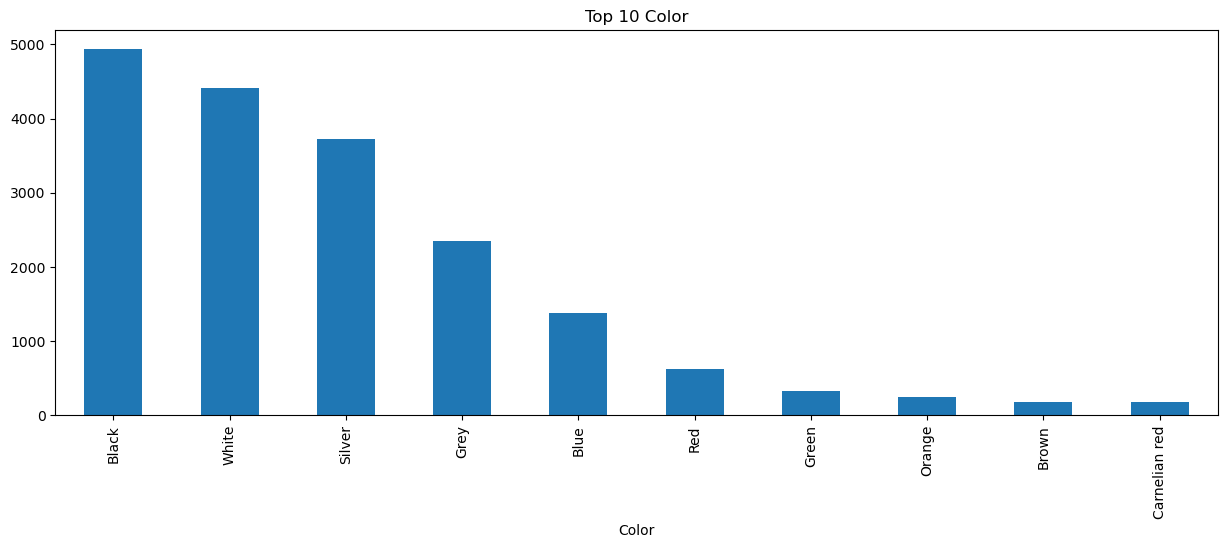

In [39]:
for col in obj:
    plt.figure(figsize=(15,5))
    top10=data[col].value_counts()[:10]
    top10.plot(kind='bar')
    plt.title('Top 10'+" "+col)
    plt.show()

In [41]:
non_obj=data.select_dtypes(exclude='object')
for i in range(0,obj.shape[1]):
    obj.iloc[:,i]=la.fit_transform(obj.iloc[:,i])
    

In [43]:
obj

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
0,114,32,1242,4,1,2,63,2838,0,0,1,0,12
1,4,8,658,4,0,5,56,2960,2,0,1,0,1
2,0,21,684,3,0,5,22,3140,3,1,1,1,1
3,512,16,661,4,1,2,46,2413,0,0,1,0,14
4,366,21,684,3,1,5,22,7396,0,1,1,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,0,36,385,1,1,0,37,4394,1,2,0,0,12
19233,504,23,1334,9,1,5,44,2214,2,1,1,0,11
19234,508,23,1442,4,1,1,36,638,0,1,1,0,7
19235,83,8,456,4,1,1,36,5612,0,1,1,0,1


In [45]:
cor=non_obj.corr()
cor

,ID,Price,Prod. year,Cylinders,Airbags
ID,1.000000,-0.000797,0.072030,-0.040617,-0.022070
Price,-0.000797,1.000000,0.012689,0.007435,-0.012709
Prod. year,0.072030,0.012689,1.000000,-0.099443,0.235160
Cylinders,-0.040617,0.007435,-0.099443,1.000000,0.174112
Airbags,-0.022070,-0.012709,0.235160,0.174112,1.000000


<Axes: >

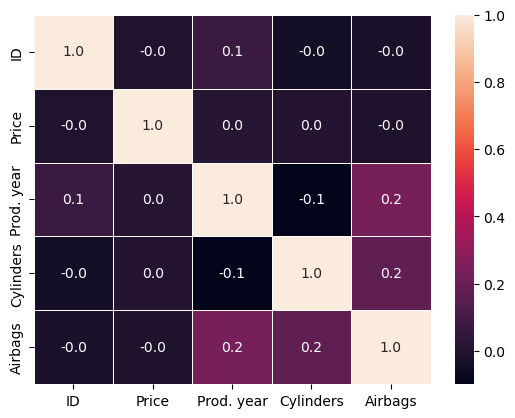

In [47]:
sns.heatmap(cor,lw='0.5',annot=True,fmt='.1f')

In [49]:
obj=obj.astype('int')

In [51]:
df=pd.concat([obj,non_obj],axis=1)

In [53]:
data =df.interpolate(method='linear')
df

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color,ID,Price,Prod. year,Cylinders,Airbags
0,114,32,1242,4,1,2,63,2838,0,0,1,0,12,45654403,13328,2010,6.0,12
1,4,8,658,4,0,5,56,2960,2,0,1,0,1,44731507,16621,2011,6.0,8
2,0,21,684,3,0,5,22,3140,3,1,1,1,1,45774419,8467,2006,4.0,2
3,512,16,661,4,1,2,46,2413,0,0,1,0,14,45769185,3607,2011,4.0,0
4,366,21,684,3,1,5,22,7396,0,1,1,0,12,45809263,11726,2014,4.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,0,36,385,1,1,0,37,4394,1,2,0,0,12,45798355,8467,1999,4.0,5
19233,504,23,1334,9,1,5,44,2214,2,1,1,0,11,45778856,15681,2011,4.0,8
19234,508,23,1442,4,1,1,36,638,0,1,1,0,7,45804997,26108,2010,4.0,4
19235,83,8,456,4,1,1,36,5612,0,1,1,0,1,45793526,5331,2007,4.0,4


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Levy              18924 non-null  int32  
 1   Manufacturer      18924 non-null  int32  
 2   Model             18924 non-null  int32  
 3   Category          18924 non-null  int32  
 4   Leather interior  18924 non-null  int32  
 5   Fuel type         18924 non-null  int32  
 6   Engine volume     18924 non-null  int32  
 7   Mileage           18924 non-null  int32  
 8   Gear box type     18924 non-null  int32  
 9   Drive wheels      18924 non-null  int32  
 10  Doors             18924 non-null  int32  
 11  Wheel             18924 non-null  int32  
 12  Color             18924 non-null  int32  
 13  ID                18924 non-null  int64  
 14  Price             18924 non-null  int64  
 15  Prod. year        18924 non-null  int64  
 16  Cylinders         18924 non-null  float64
 17

In [57]:
data.corr()

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color,ID,Price,Prod. year,Cylinders,Airbags
Levy,1.000000,-0.081522,0.074076,0.080908,0.311177,-0.041820,-0.234736,0.111090,-0.286941,0.000334,0.130461,-0.272744,0.076077,0.117613,-0.008950,0.431364,-0.273564,-0.020940
Manufacturer,-0.081522,1.000000,-0.017196,-0.038951,-0.175233,-0.087002,-0.044483,-0.035694,0.055739,-0.066787,0.047499,0.086100,0.031369,-0.034396,-0.003567,-0.051567,-0.090110,0.180558
Model,0.074076,-0.017196,1.000000,-0.165242,-0.002072,-0.168451,0.025503,0.010489,-0.056149,-0.185820,0.071607,-0.033839,0.072150,-0.003355,0.000662,0.064736,-0.007303,-0.105103
Category,0.080908,-0.038951,-0.165242,1.000000,0.092195,0.112179,0.013260,0.036323,-0.009413,0.212334,0.221986,-0.119409,-0.019457,0.043807,-0.019848,0.070824,-0.064761,0.134615
Leather interior,0.311177,-0.175233,-0.002072,0.092195,1.000000,-0.033814,0.283011,0.111978,-0.288333,-0.087991,0.094042,-0.346620,-0.056343,0.098480,0.000551,0.388608,0.199716,0.161889
Fuel type,-0.041820,-0.087002,-0.168451,0.112179,-0.033814,1.000000,0.004766,0.032045,0.103579,-0.041325,-0.044347,0.081820,-0.077465,-0.015685,-0.012476,0.055149,0.078438,0.078033
Engine volume,-0.234736,-0.044483,0.025503,0.013260,0.283011,0.004766,1.000000,-0.025135,-0.001136,-0.229276,-0.013690,-0.200499,-0.127872,-0.013336,0.009160,-0.034546,0.783965,0.238805
Mileage,0.111090,-0.035694,0.010489,0.036323,0.111978,0.032045,-0.025135,1.000000,-0.044058,-0.003228,0.015839,-0.117240,-0.005043,0.008800,0.025497,0.190099,-0.049429,0.039106
Gear box type,-0.286941,0.055739,-0.056149,-0.009413,-0.288333,0.103579,-0.001136,-0.044058,1.000000,0.088750,-0.073837,0.136033,-0.041935,-0.086910,0.016060,-0.218997,0.059993,0.109833
Drive wheels,0.000334,-0.066787,-0.185820,0.212334,-0.087991,-0.041325,-0.229276,-0.003228,0.088750,1.000000,-0.136214,-0.008331,0.060233,-0.012649,-0.003306,-0.125089,-0.206277,-0.020988


In [59]:
data=data.drop(['ID','Doors'],axis=1)

In [61]:
data.head()

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Wheel,Color,Price,Prod. year,Cylinders,Airbags
0,114,32,1242,4,1,2,63,2838,0,0,0,12,13328,2010,6.0,12
1,4,8,658,4,0,5,56,2960,2,0,0,1,16621,2011,6.0,8
2,0,21,684,3,0,5,22,3140,3,1,1,1,8467,2006,4.0,2
3,512,16,661,4,1,2,46,2413,0,0,0,14,3607,2011,4.0,0
4,366,21,684,3,1,5,22,7396,0,1,0,12,11726,2014,4.0,4


In [63]:
data.columns

Index(['Levy', 'Manufacturer', 'Model', 'Category', 'Leather interior',
       'Fuel type', 'Engine volume', 'Mileage', 'Gear box type',
       'Drive wheels', 'Wheel', 'Color', 'Price', 'Prod. year', 'Cylinders',
       'Airbags'],
      dtype='object')

In [65]:
import datetime
dtime=datetime.datetime.now()

In [67]:
data['Age']=dtime.year-data['Prod. year']

In [69]:
data.head()

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Wheel,Color,Price,Prod. year,Cylinders,Airbags,Age
0,114,32,1242,4,1,2,63,2838,0,0,0,12,13328,2010,6.0,12,14
1,4,8,658,4,0,5,56,2960,2,0,0,1,16621,2011,6.0,8,13
2,0,21,684,3,0,5,22,3140,3,1,1,1,8467,2006,4.0,2,18
3,512,16,661,4,1,2,46,2413,0,0,0,14,3607,2011,4.0,0,13
4,366,21,684,3,1,5,22,7396,0,1,0,12,11726,2014,4.0,4,10


In [71]:
data=data.drop(['Prod. year'],axis=1)

In [73]:
data.head()

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Wheel,Color,Price,Cylinders,Airbags,Age
0,114,32,1242,4,1,2,63,2838,0,0,0,12,13328,6.0,12,14
1,4,8,658,4,0,5,56,2960,2,0,0,1,16621,6.0,8,13
2,0,21,684,3,0,5,22,3140,3,1,1,1,8467,4.0,2,18
3,512,16,661,4,1,2,46,2413,0,0,0,14,3607,4.0,0,13
4,366,21,684,3,1,5,22,7396,0,1,0,12,11726,4.0,4,10


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Levy              18924 non-null  int32  
 1   Manufacturer      18924 non-null  int32  
 2   Model             18924 non-null  int32  
 3   Category          18924 non-null  int32  
 4   Leather interior  18924 non-null  int32  
 5   Fuel type         18924 non-null  int32  
 6   Engine volume     18924 non-null  int32  
 7   Mileage           18924 non-null  int32  
 8   Gear box type     18924 non-null  int32  
 9   Drive wheels      18924 non-null  int32  
 10  Wheel             18924 non-null  int32  
 11  Color             18924 non-null  int32  
 12  Price             18924 non-null  int64  
 13  Cylinders         18924 non-null  float64
 14  Airbags           18924 non-null  int64  
 15  Age               18924 non-null  int64  
dtypes: float64(1), int32(12), int64(3)
memory usa

In [77]:
data.head()

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Wheel,Color,Price,Cylinders,Airbags,Age
0,114,32,1242,4,1,2,63,2838,0,0,0,12,13328,6.0,12,14
1,4,8,658,4,0,5,56,2960,2,0,0,1,16621,6.0,8,13
2,0,21,684,3,0,5,22,3140,3,1,1,1,8467,4.0,2,18
3,512,16,661,4,1,2,46,2413,0,0,0,14,3607,4.0,0,13
4,366,21,684,3,1,5,22,7396,0,1,0,12,11726,4.0,4,10


In [79]:
data.head()

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Wheel,Color,Price,Cylinders,Airbags,Age
0,114,32,1242,4,1,2,63,2838,0,0,0,12,13328,6.0,12,14
1,4,8,658,4,0,5,56,2960,2,0,0,1,16621,6.0,8,13
2,0,21,684,3,0,5,22,3140,3,1,1,1,8467,4.0,2,18
3,512,16,661,4,1,2,46,2413,0,0,0,14,3607,4.0,0,13
4,366,21,684,3,1,5,22,7396,0,1,0,12,11726,4.0,4,10


# Create Model

In [155]:
x=data.drop('Price',axis=1)
y=data['Price']

In [157]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=21)

In [159]:
model1=LogisticRegression()
model2=XGBRegressor()
model3=KNeighborsClassifier()
model4=GaussianNB()
model5=DecisionTreeClassifier()

In [161]:
Algorithm=['LogisticRegression','XGBRegressor','KNeighborsClassifier','GaussianNB','DecisionTreeClassifier']
R2=[]
RMSE=[]

In [163]:
def models(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    rmse=np.sqrt(mean_squared_error(y_test,pre))
    R2.append(r2)
    RMSE.append(rmse)
    score=model.score(x_test,y_test)
    print(f"the score of model is :{score}")

In [165]:
models(model1)
models(model2)  
models(model3)
models(model4)  
models(model5)

the score of model is :0.024570673712021138
the score of model is :0.0009709312755205035
the score of model is :0.16248348745046234
the score of model is :0.03381770145310436
the score of model is :0.235667107001321


In [167]:
pd.DataFrame({'Algorithm':Algorithm,'R2_score':R2,'RMSE':RMSE})


,Algorithm,R2_score,RMSE
0,LogisticRegression,-0.001859,428332.281233
1,XGBRegressor,0.000971,427726.847609
2,KNeighborsClassifier,-0.001554,428267.110701
3,GaussianNB,-0.002328,428432.541270
4,DecisionTreeClassifier,-0.000550,428052.342627
